In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
from final_algo import new_algo
import networkx as nx
import matplotlib.pyplot as plt
from paper_sims_util import run_single_MTP, attr_threshold, modularity
import sklearn.covariance
from sklearn.covariance import GraphicalLassoCV
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pickle

In [2]:
stocks = np.load('stockdata_data.npy')
stocks_log = np.diff(np.log(stocks), axis = 0)
print(stocks_log.shape)

info = np.load('stockdata_info.npy')
print(info.shape)
print(set(info[:, 1]))

(1257, 452)
(452, 3)
{'Health Care', 'Telecommunications Services', 'Information Technology', 'Industrials', 'Materials', 'Energy', 'Utilities', 'Financials', 'Consumer Staples', 'Consumer Discretionary'}


In [32]:
sectors_list = list(set(info[:, 1]))
sector_to_color = dict(zip(sectors_list, ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']))
colors = [sector_to_color[sector[node]] for node in graph]

In [33]:
num_stocks = 100

In [34]:
sector = info[:num_stocks, 1]
S = np.cov(stocks_log[:, :num_stocks].T)
X = stocks_log[:, :num_stocks]

In [ ]:
start = time.time()
prec = new_algo(X)
end = time.time()
print(end-start)
graph = nx.from_numpy_matrix(prec)

In [35]:
prec = pickle.load(open('stocks_100_our_algo_prec.pkl', 'rb'))
graph = nx.from_numpy_matrix(prec)

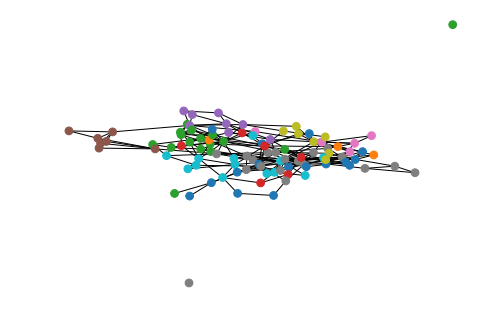

In [36]:
nx.draw(graph, node_color = colors, node_size = 60)

In [37]:
modularity(graph, sector)

0.45611496913580285

In [39]:
glasso = GraphicalLassoCV(alphas = 10, n_refinements = 10, cv=5)
glasso.fit(S)
glassocv_prec = glasso.get_precision()
glassocv_graph = nx.from_numpy_matrix(glassocv_prec)

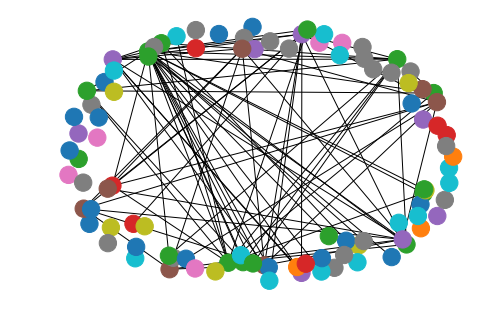

In [41]:
nx.draw(glassocv_graph, node_color = colors)

In [42]:
modularity(glassocv_graph, sector)

0.3718448843968413

In [43]:
alpha_to_prec = {}
for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 10.]:
    glasso_prec = sklearn.covariance.graph_lasso(S, alpha = alpha)[1]
    glasso_graph = nx.from_numpy_matrix(glasso_prec)
    alpha_to_prec[alpha] = glasso_prec
    #nx.draw(glasso_graph)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function graph_lasso is deprecated; The 'graph_lasso' was renamed to 'graphical_lasso' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function graph_lasso is deprecated; The 'graph_lasso' was renamed to 'graphical_lasso' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function graph_lasso is deprecated; The 'graph_lasso' was renamed to 'graphical_lasso' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function graph_lasso is deprecated; The 'graph_lasso' was renamed to 'graphical_lasso'

In [44]:
for alpha, prec in alpha_to_prec.items():
    graph = nx.from_numpy_matrix(prec)
    print(modularity(graph, sector))

0.3746865937832839
0.4214842051313867
nan
nan
nan
nan
nan


/Users/umaroy/Documents/meng/MTP2-algorithm/paper_sims_util.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Q += A[i,j] - k_i*k_j / (2*E)


In [46]:
MTP2_og_prec = run_single_MTP(S)

In [49]:
thres_to_prec = {}
for thres in [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]:
    p = attr_threshold(MTP2_og_prec, thres)
    thres_to_prec[thres] = p
    print(thres, modularity(nx.from_numpy_matrix(p), sector))

0.6 0.3967828416063263
0.7 0.38957930692557025
0.8 0.38556337039533345
0.85 0.3837322176563791
0.9 0.3825965146773167
0.95 0.38224382745692265
0.99 0.38205760601139976


In [156]:
MTP2_prec = attr_threshold(MTP2_og_prec, 0.6)
MTP2_graph = nx.from_numpy_matrix(MTP2_prec)

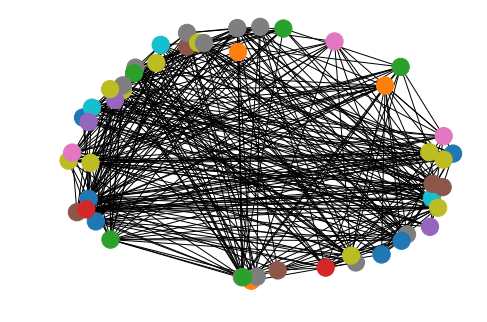

In [157]:
nx.draw(MTP2_graph, node_color = colors)

In [158]:
modularity(MTP2_graph, sector)

0.3114398381870177